# Modelos Bagging y Bagging con Extratree

In [26]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df_M = pd.read_csv('C:/Users/danie/Documents/Daniel/SIMAT/datosstand_con_comuna.csv')
df_M = df_M.loc[:, ~df_M.columns.str.contains('^Unnamed')]

# Conjunto de variables que consideramos relevantes en el modelo
inputs = df_M[['bedrooms', 'bathrooms', 'surface_total', 'Apartamento', 'Casa', 'price']]
inputs1 = df_M.loc[:,'ALTAVISTA':]
inputs = pd.concat([inputs,inputs1], axis = 1)

# Eliminamos Casa y AltaVista para evitar redundancias en el modelo
esCasaoApto = inputs[['Apartamento', 'Casa']].apply(lambda x: False if (x[0] == 0 and x[1] == 0) else True, axis = 1)
inputs = inputs.loc[esCasaoApto]

# Como resultado tenemos nuestras variables independientes
inputs = inputs.drop(columns = ['Casa', 'ALTAVISTA'])

# Target
output = inputs['price']

# Eliminamos el precio
inputs = inputs.drop(columns = ['price'])

# Separamos datos de entrenamiento con los de validacion
X_train, X_test, Y_train, Y_test = train_test_split(inputs, output, train_size=0.7, random_state=40)
print('tamaños de train , test ',X_train.shape, X_test.shape)

tamaños de train , test  (12174, 24) (5218, 24)


BaggingRegressor

In [27]:
import sklearn
from sklearn.ensemble import BaggingRegressor
model2 = sklearn.ensemble.BaggingRegressor(n_estimators = 2000, max_samples = 20, max_features =19)
model2.fit(X_train, Y_train)

prediction2 = model2.predict(X_test)
score = model2.score(X_test, Y_test)

score

0.6665088756576012

Bagging with Extratree

In [28]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import ExtraTreeRegressor
extra_tree = ExtraTreeRegressor(splitter = "best" ,random_state=1000)
lin_reg = BaggingRegressor(extra_tree, random_state=1000, n_estimators=20)
lin_reg.fit(X_train, Y_train)

BaggingRegressor(base_estimator=ExtraTreeRegressor(criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   random_state=1000,
                                                   splitter='best'),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=1.0, n_estimators=20, n_jobs=None, oob_score=False,
                 random_state=1000, verbose=0,

In [29]:
Y_test_estimate = lin_reg.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
rmse = mean_squared_error(Y_test, Y_test_estimate)
print("Root Mean Square Error (RMSE)= {}".format(rmse))
mae = mean_absolute_error(Y_test, Y_test_estimate)
print("Mean Absolute Error (MAE)= {}".format(mae))
r2 = r2_score(Y_test, Y_test_estimate)
print("R^2 = {}".format(r2))

Root Mean Square Error (RMSE)= 0.08140501184108863
Mean Absolute Error (MAE)= 0.1893441859224025
R^2 = 0.7704192852461851


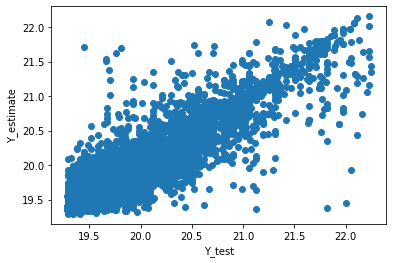

In [10]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, Y_test_estimate)
plt.xlabel("Y_test")
plt.ylabel("Y_estimate")
plt.show()

# Solo con casas

In [21]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df_M = pd.read_csv('C:/Users/danie/Documents/Daniel/SIMAT/datosstand_con_comuna.csv')
df_M = df_M.loc[:, ~df_M.columns.str.contains('^Unnamed')]

# Conjunto de variables que consideramos relevantes en el modelo
inputs = df_M.drop(columns = ['price_real', 'created_on', 'end_date'])

# Seleccionamos unicamente casas
inputs = inputs[inputs['Casa'] == 1]

# Como resultado tenemos nuestras variables independientes
inputs = inputs.drop(columns = df_M.loc[:,'Apartamento':'ALTAVISTA'].keys())

# Target
output = inputs['price']

# Eliminamos el precio
inputs = inputs.drop(columns = ['price'])

# Separamos datos de entrenamiento con los de validacion
X_train, X_test, Y_train, Y_test = train_test_split(inputs, output, train_size=0.7, random_state=40)
print('tamaños de train , test ',X_train.shape, X_test.shape)

tamaños de train , test  (4621, 26) (1981, 26)


In [22]:
import sklearn
from sklearn.ensemble import BaggingRegressor
model2 = sklearn.ensemble.BaggingRegressor(n_estimators = 2000, max_samples = 20, max_features =19)
model2.fit(X_train, Y_train)

prediction2 = model2.predict(X_test)
score = model2.score(X_test, Y_test)

score

0.6920262694174785

In [23]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import ExtraTreeRegressor
extra_tree = ExtraTreeRegressor(splitter = "best" ,random_state=1000)
lin_reg = BaggingRegressor(extra_tree, random_state=1000, n_estimators=20)
lin_reg.fit(X_train, Y_train)

BaggingRegressor(base_estimator=ExtraTreeRegressor(criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   random_state=1000,
                                                   splitter='best'),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=1.0, n_estimators=20, n_jobs=None, oob_score=False,
                 random_state=1000, verbose=0,

In [25]:
Y_test_estimate = lin_reg.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
rmse = mean_squared_error(Y_test, Y_test_estimate)
print("Root Mean Square Error (RMSE)= {}".format(rmse))
mae = mean_absolute_error(Y_test, Y_test_estimate)
print("Mean Absolute Error (MAE)= {}".format(mae))
r2 = r2_score(Y_test, Y_test_estimate)
print("R^2 = {}".format(r2))

Root Mean Square Error (RMSE)= 0.0883447942207841
Mean Absolute Error (MAE)= 0.21228750487170917
R^2 = 0.8080416676517304


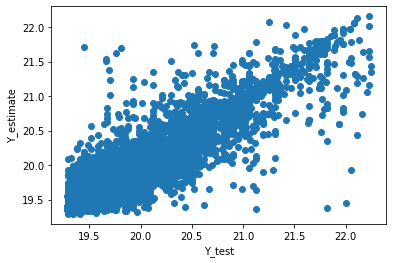

In [30]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, Y_test_estimate)
plt.xlabel("Y_test")
plt.ylabel("Y_estimate")
plt.show()

# Solo con Apartamentos

In [31]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df_M = pd.read_csv('C:/Users/danie/Documents/Daniel/SIMAT/datosstand_con_comuna.csv')
df_M = df_M.loc[:, ~df_M.columns.str.contains('^Unnamed')]

# Conjunto de variables que consideramos relevantes en el modelo
inputs = df_M.drop(columns = ['price_real', 'created_on', 'end_date'])

# Seleccionamos unicamente casas
inputs = inputs[inputs['Apartamento'] == 1]

# Como resultado tenemos nuestras variables independientes
inputs = inputs.drop(columns = df_M.loc[:,'Apartamento':'ALTAVISTA'].keys())

# Target
output = inputs['price']

# Eliminamos el precio
inputs = inputs.drop(columns = ['price'])

# Separamos datos de entrenamiento con los de validacion
X_train, X_test, Y_train, Y_test = train_test_split(inputs, output, train_size=0.7, random_state=40)
print('tamaños de train , test ',X_train.shape, X_test.shape)

tamaños de train , test  (7552, 26) (3238, 26)


In [32]:
import sklearn
from sklearn.ensemble import BaggingRegressor
model2 = sklearn.ensemble.BaggingRegressor(n_estimators = 2000, max_samples = 20, max_features =19)
model2.fit(X_train, Y_train)

prediction2 = model2.predict(X_test)
score = model2.score(X_test, Y_test)

score

0.6369266985938687

In [33]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import ExtraTreeRegressor
extra_tree = ExtraTreeRegressor(splitter = "best" ,random_state=1000)
lin_reg = BaggingRegressor(extra_tree, random_state=1000, n_estimators=20)
lin_reg.fit(X_train, Y_train)

BaggingRegressor(base_estimator=ExtraTreeRegressor(criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   random_state=1000,
                                                   splitter='best'),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=1.0, n_estimators=20, n_jobs=None, oob_score=False,
                 random_state=1000, verbose=0,

In [34]:
Y_test_estimate = lin_reg.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
rmse = mean_squared_error(Y_test, Y_test_estimate)
print("Root Mean Square Error (RMSE)= {}".format(rmse))
mae = mean_absolute_error(Y_test, Y_test_estimate)
print("Mean Absolute Error (MAE)= {}".format(mae))
r2 = r2_score(Y_test, Y_test_estimate)
print("R^2 = {}".format(r2))

Root Mean Square Error (RMSE)= 0.05429312375515767
Mean Absolute Error (MAE)= 0.16340733261513407
R^2 = 0.7611069271599399


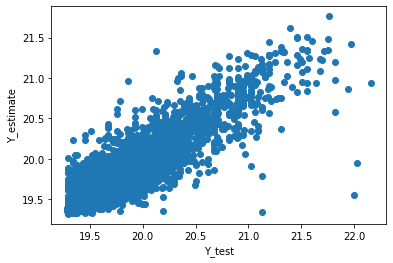

In [35]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, Y_test_estimate)
plt.xlabel("Y_test")
plt.ylabel("Y_estimate")
plt.show()

# Modelos con Random Forest

In [36]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df_M = pd.read_csv('C:/Users/danie/Documents/Daniel/SIMAT/datosstand_con_comuna.csv')
df_M = df_M.loc[:, ~df_M.columns.str.contains('^Unnamed')]

# Conjunto de variables que consideramos relevantes en el modelo
inputs = df_M[['bedrooms', 'bathrooms', 'surface_total', 'Apartamento', 'Casa', 'price']]
inputs1 = df_M.loc[:,'ALTAVISTA':]
inputs = pd.concat([inputs,inputs1], axis = 1)

# Eliminamos Casa y AltaVista para evitar redundancias en el modelo
esCasaoApto = inputs[['Apartamento', 'Casa']].apply(lambda x: False if (x[0] == 0 and x[1] == 0) else True, axis = 1)
inputs = inputs.loc[esCasaoApto]

# Como resultado tenemos nuestras variables independientes
inputs = inputs.drop(columns = ['Casa', 'ALTAVISTA'])

# Target
output = inputs['price']

# Eliminamos el precio
inputs = inputs.drop(columns = ['price'])

# Separamos datos de entrenamiento con los de validacion
X_train, X_test, Y_train, Y_test = train_test_split(inputs, output, train_size=0.7, random_state=40)
print('tamaños de train , test ',X_train.shape, X_test.shape)

tamaños de train , test  (12174, 24) (5218, 24)


In [43]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators = 2000, max_features =19)
model2.fit(X_train, Y_train)
score = model2.score(X_test, Y_test)
score

0.7777230864892176

In [44]:
Y_test_estimate = model2.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
rmse = mean_squared_error(Y_test, Y_test_estimate)
print("Root Mean Square Error (RMSE)= {}".format(rmse))
mae = mean_absolute_error(Y_test, Y_test_estimate)
print("Mean Absolute Error (MAE)= {}".format(mae))
r2 = r2_score(Y_test, Y_test_estimate)
print("R^2 = {}".format(r2))

Root Mean Square Error (RMSE)= 0.07881522102476685
Mean Absolute Error (MAE)= 0.18692089627024544
R^2 = 0.7777230864892176


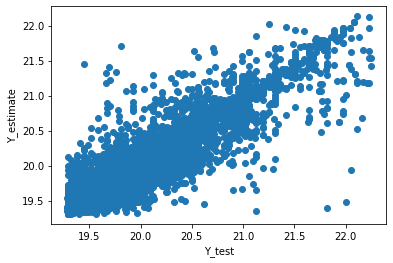

In [45]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, Y_test_estimate)
plt.xlabel("Y_test")
plt.ylabel("Y_estimate")
plt.show()

# Solo casa

In [57]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df_M = pd.read_csv('C:/Users/danie/Documents/Daniel/SIMAT/datosstand_con_comuna.csv')
df_M = df_M.loc[:, ~df_M.columns.str.contains('^Unnamed')]

# Conjunto de variables que consideramos relevantes en el modelo
inputs = df_M.drop(columns = ['price_real', 'created_on', 'end_date'])

# Seleccionamos unicamente casas
inputs = inputs[inputs['Casa'] == 1]

# Como resultado tenemos nuestras variables independientes
inputs = inputs.drop(columns = df_M.loc[:,'Apartamento':'ALTAVISTA'].keys())

# Target
output = inputs['price']

# Eliminamos el precio
inputs = inputs.drop(columns = ['price'])

# Separamos datos de entrenamiento con los de validacion
X_train, X_test, Y_train, Y_test = train_test_split(inputs, output, train_size=0.7, random_state=40)
print('tamaños de train , test ',X_train.shape, X_test.shape)

tamaños de train , test  (4621, 26) (1981, 26)


In [58]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators = 2000, max_features =19)
model2.fit(X_train, Y_train)
score = model2.score(X_test, Y_test)
score

0.819735304384972

In [59]:
Y_test_estimate = model2.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
rmse = mean_squared_error(Y_test, Y_test_estimate)
print("Root Mean Square Error (RMSE)= {}".format(rmse))
mae = mean_absolute_error(Y_test, Y_test_estimate)
print("Mean Absolute Error (MAE)= {}".format(mae))
r2 = r2_score(Y_test, Y_test_estimate)
print("R^2 = {}".format(r2))

Root Mean Square Error (RMSE)= 0.08296304330508783
Mean Absolute Error (MAE)= 0.20344538644093374
R^2 = 0.819735304384972


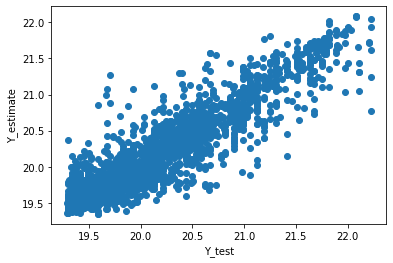

In [60]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, Y_test_estimate)
plt.xlabel("Y_test")
plt.ylabel("Y_estimate")
plt.show()

# Solo Apartamentos

In [61]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df_M = pd.read_csv('C:/Users/danie/Documents/Daniel/SIMAT/datosstand_con_comuna.csv')
df_M = df_M.loc[:, ~df_M.columns.str.contains('^Unnamed')]

# Conjunto de variables que consideramos relevantes en el modelo
inputs = df_M.drop(columns = ['price_real', 'created_on', 'end_date'])

# Seleccionamos unicamente casas
inputs = inputs[inputs['Apartamento'] == 1]

# Como resultado tenemos nuestras variables independientes
inputs = inputs.drop(columns = df_M.loc[:,'Apartamento':'ALTAVISTA'].keys())

# Target
output = inputs['price']

# Eliminamos el precio
inputs = inputs.drop(columns = ['price'])

# Separamos datos de entrenamiento con los de validacion
X_train, X_test, Y_train, Y_test = train_test_split(inputs, output, train_size=0.7, random_state=40)
print('tamaños de train , test ',X_train.shape, X_test.shape)

tamaños de train , test  (7552, 26) (3238, 26)


In [62]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators = 2000, max_features =19)
model2.fit(X_train, Y_train)
score = model2.score(X_test, Y_test)
score

0.7709997960837576

In [63]:
Y_test_estimate = model2.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
rmse = mean_squared_error(Y_test, Y_test_estimate)
print("Root Mean Square Error (RMSE)= {}".format(rmse))
mae = mean_absolute_error(Y_test, Y_test_estimate)
print("Mean Absolute Error (MAE)= {}".format(mae))
r2 = r2_score(Y_test, Y_test_estimate)
print("R^2 = {}".format(r2))

Root Mean Square Error (RMSE)= 0.05204477577926645
Mean Absolute Error (MAE)= 0.1609039763248285
R^2 = 0.7709997960837576


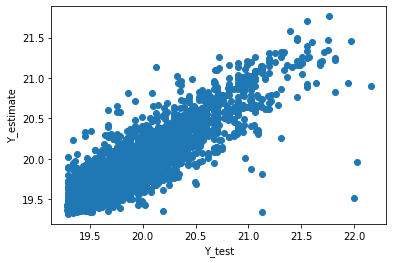

In [64]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, Y_test_estimate)
plt.xlabel("Y_test")
plt.ylabel("Y_estimate")
plt.show()